## Spacy Language Processing Pipelines Tutorial

<h3>Blank nlp pipeline</h3>

In [14]:
import spacy

nlp = spacy.blank("en")

doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc:
    print(token)

Captain
america
ate
100
$
of
samosa
.
Then
he
said
I
can
do
this
all
day
.


We get above error because we have a blank pipeline as shown below. Pipeline is something that starts with a Tokenizer component in a dotted rectange below. You can see there is nothing there hence the blank pipeline

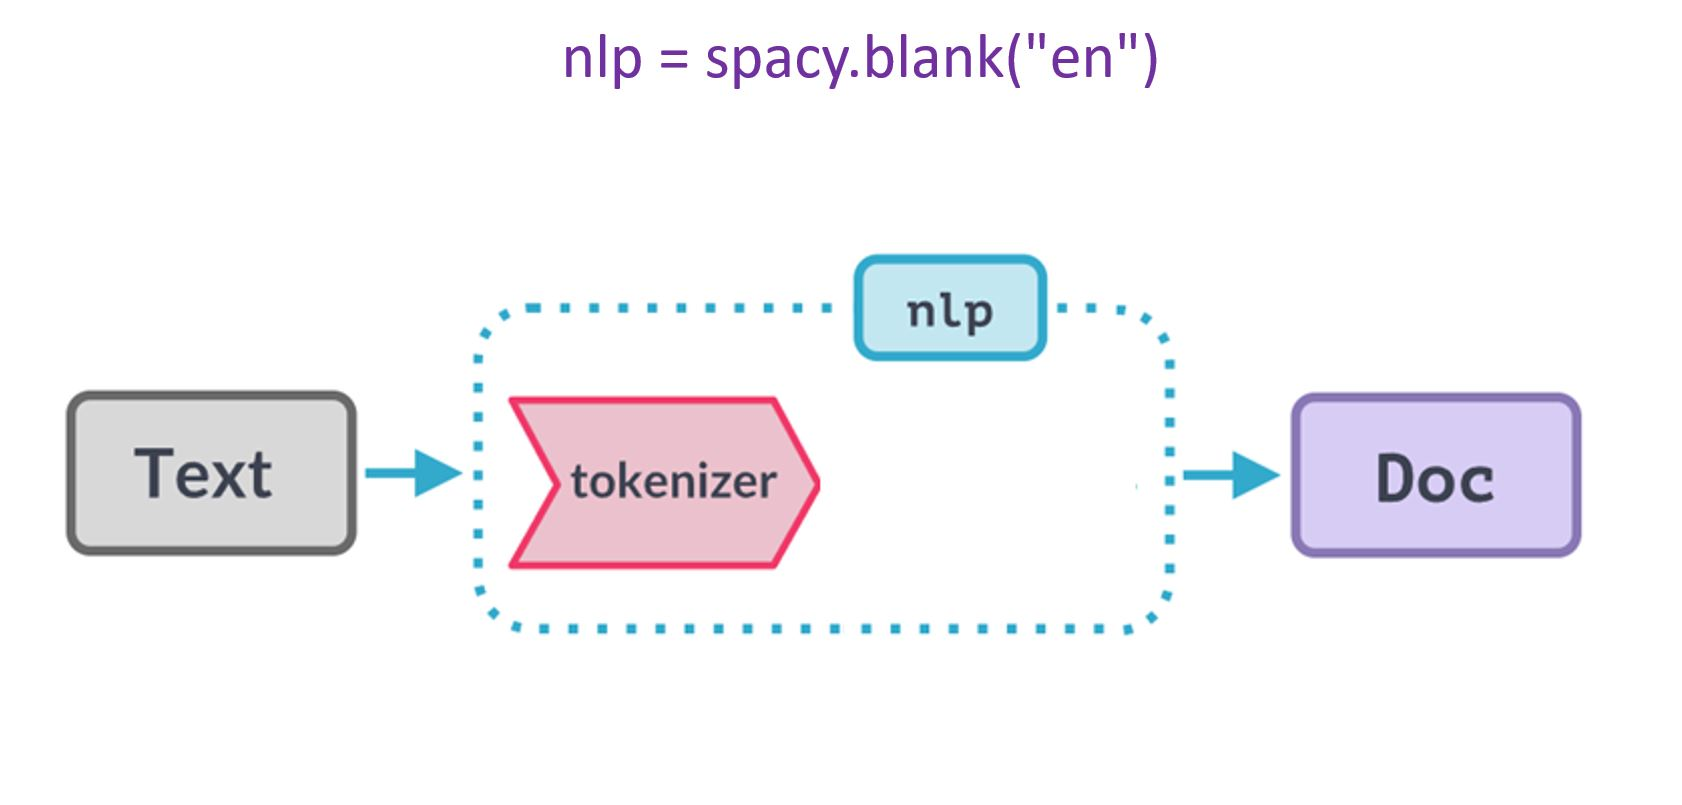

In [15]:
nlp.pipe_names

[]

nlp.pipe_names is empty array indicating no components in the pipeline. Pipeline is something that starts with a tokenizer 

More general diagram for nlp pipeline may look something like below

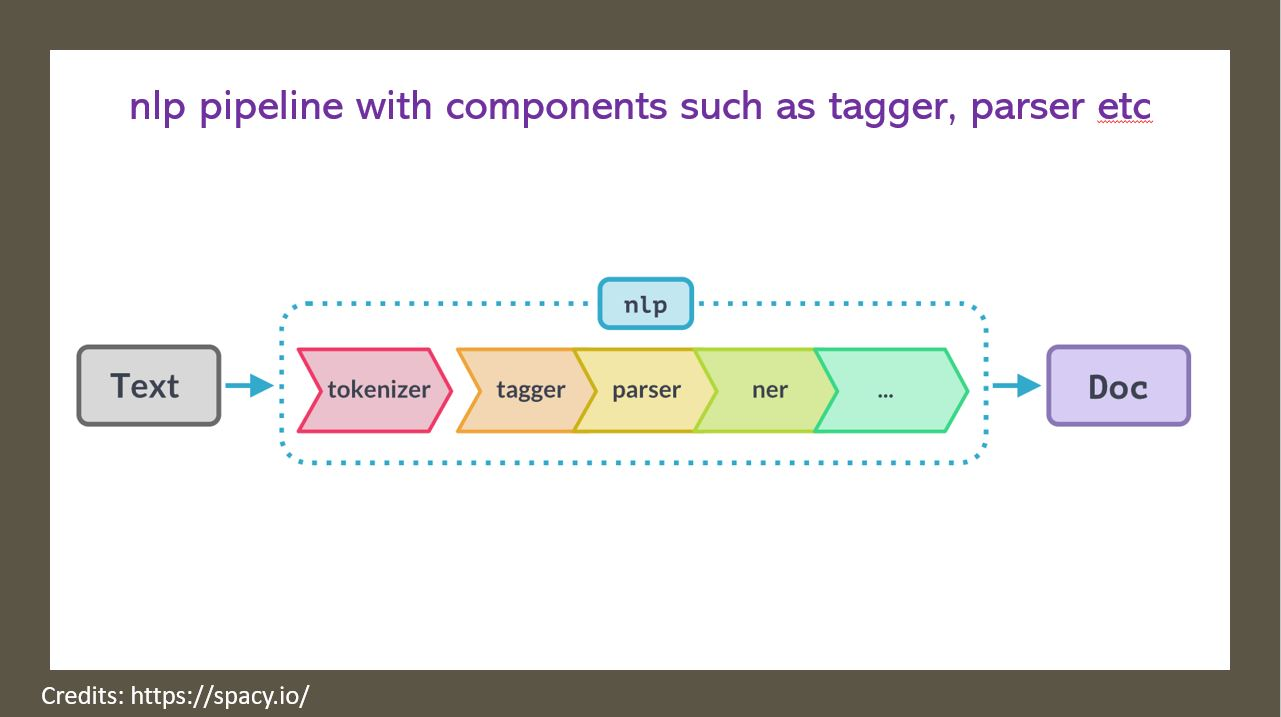

<h3>Download trained pipeline</h3>

To download trained pipeline use a command such as,

python -m spacy download en_core_web_sm

This downloads the small (sm) pipeline for english language

Further instructions on : https://spacy.io/usage/models#quickstart

In [16]:
nlp = spacy.load("en_core_web_lg")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [17]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x1d63e282f30>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x1d63e281df0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x1d647144f90>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x1d629d792d0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x1d629d7bd10>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x1d647144cf0>)]

sm in en_core_web_sm means small. There are other models available as well such as medium, large etc. Check this: https://spacy.io/usage/models#quickstart

In [18]:
doc1 = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc1:
    print(token, " | ", spacy.explain(token.pos_), " | ", token.lemma_)

Captain  |  proper noun  |  Captain
america  |  proper noun  |  america
ate  |  verb  |  eat
100  |  numeral  |  100
$  |  numeral  |  $
of  |  adposition  |  of
samosa  |  noun  |  samosa
.  |  punctuation  |  .
Then  |  adverb  |  then
he  |  pronoun  |  he
said  |  verb  |  say
I  |  pronoun  |  I
can  |  auxiliary  |  can
do  |  verb  |  do
this  |  pronoun  |  this
all  |  determiner  |  all
day  |  noun  |  day
.  |  punctuation  |  .


<h3>Named Entity Recognition</h3>

In [19]:
doc2 = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc2.ents:
    print(ent.text, ent.label_)

Tesla Inc ORG
$45 billion MONEY


In [20]:
from spacy import displacy

displacy.render(doc2, style="ent")

<h3>Further reading</h3>

https://spacy.io/usage/processing-pipelines#pipelines

Excercise

In [4]:
text = '''Ravi and Raju are the best friends from school days.They wanted to go for a world tour and 
visit famous cities like Paris, London, Dubai, Rome etc and also they called their another friend Mohan to take part of this world tour.
They started their journey from Hyderabad and spent next 3 months travelling all the wonderful cities in the world and cherish a happy moments!
'''

In [12]:
doc=nlp(text)
proper_noun=[]
for token in doc:
    if token.pos_ =="PROPN":
        proper_noun.append(token)
print(proper_noun)
count=len(proper_noun)
count

[Ravi, Raju, Paris, London, Dubai, Rome, Mohan, Hyderabad]


8

In [13]:
text = '''The Top 5 companies in USA are Tesla, Walmart, Amazon, Microsoft, Google and the top 5 companies in 
India are Infosys, Reliance, HDFC Bank, Hindustan Unilever and Bharti Airtel'''

In [16]:
doc1=nlp(text)
all_company=[]
for ent in doc1.ents:
    if ent.label_ == "ORG":
        all_company.append(ent)
print(all_company)
len(all_company)

[Tesla, Walmart, Amazon, Microsoft, Google, Infosys, Reliance, HDFC Bank, Hindustan Unilever, Bharti Airtel]


10